In [42]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print(os.getcwd())


c:\DATA\Google Drive\KU\Semester 3\Cognitive Science 3\Project\cs3-vr\ipynb


In [2]:
conditions = pd.read_csv("../data/conditions.csv")
paper_scores = pd.read_csv("../data/exam/paper_test_scores.csv")
exam_scores = pd.read_csv("../data/exam/exam-results.tsv", sep = "\t")
paper_scores.rename(columns = {"participant": "participant_number"}, inplace="True")

In [3]:
def grade_declarative(participant):
    result = np.zeros((11), dtype=int)
    result[0] = participant.iloc[:,1].values[0]
    result[1] = 1 if 'and will buy' in participant.iloc[:,2].values[0] else 0
    result[2] = 1 if 'willingness and ability' in participant.iloc[:,3].values[0] else 0
    result[3] = 1 if 'can be expected to increase' in participant.iloc[:,4].values[0] else 0
    result[4] = 1 if 'can be expected to increase' in participant.iloc[:,5].values[0] else 0
    result[5] = 1 if 'households or companies' in participant.iloc[:,6].values[0] else 0
    result[6] = 1 if 'along with other products' in participant.iloc[:,7].values[0] else 0
    result[7] = 1 if 'fulfill the same need' in participant.iloc[:,8].values[0] else 0
    result[8] = 1 if 'None of the above' in participant.iloc[:,9].values[0] else 0
    result[9] = 1 if 'None of the above' in participant.iloc[:,10].values[0] else 0
    result[10] = 1 if 'are balanced' in participant.iloc[:,11].values[0] else 0
    
    return np.array([result[0], np.sum(result[1:])])
    


def grade_conceptual(participant):
    result = np.zeros((7), dtype=int)
    result[0] = participant.iloc[:,1].values[0]
    result[1] += 1 if 'a)' in participant.iloc[:,12].values[0] else 0
    result[1] += 1 if 'd)' in participant.iloc[:,12].values[0] else 0
    result[2] = 1 if 'likely to increase' in participant.iloc[:,13].values[0] else 0
    result[3] += 1 if 'Running shoes' in participant.iloc[:,14].values[0] else 0
    result[3] += 1 if 'Washers' in participant.iloc[:,14].values[0] else 0
    result[3] += 1 if 'cleats' in participant.iloc[:,14].values[0] else 0
    result[4] += 1 if 'excess supply' in participant.iloc[:,15].values[0] else 0
    result[5] += 1 if 'taxes' in participant.iloc[:,16].values[0] else 0
    result[5] += 1 if 'maintaining' in participant.iloc[:,16].values[0] else 0
    result[5] += 1 if 'buying' in participant.iloc[:,16].values[0] else 0
    result[5] += 1 if 'wages' in participant.iloc[:,16].values[0] else 0
    result[6] += 1 if 'Pens' in participant.iloc[:,17].values[0] else 0
    result[6] += 1 if 'Android' in participant.iloc[:,17].values[0] else 0
    # print(result)
    return np.array([result[0], np.sum(result[1:])])



# grade(exam_scores.iloc[[5]])

In [4]:
conceptual_score = np.array([grade_conceptual(exam_scores.iloc[[i]]) for i in range(exam_scores.shape[0])])
conceptual_score = pd.DataFrame({'participant_number': conceptual_score[:,0], 'conceptual_score': conceptual_score[:,1]})

declarative_score = np.array([grade_declarative(exam_scores.iloc[[i]]) for i in range(exam_scores.shape[0])])
declarative_score = pd.DataFrame({'participant_number': declarative_score[:,0], 'declarative_score': declarative_score[:,1]})

In [5]:
merged = pd.merge(conditions, paper_scores, on="participant_number")
merged = pd.merge(merged, conceptual_score, on="participant_number")
merged = pd.merge(merged, declarative_score, on="participant_number")
merged.drop(['q1', 'q2', 'q3', 'q4', 'q5'], axis = 1, inplace=True)
merged.rename(columns={"total": "procedural_score"}, inplace=True)
merged['total_score'] = merged.procedural_score + merged.conceptual_score + merged.declarative_score
merged = merged[~merged.participant_number.isin(['9553'])] #remove Petur
merged


,participant_number,condition,procedural_score,conceptual_score,declarative_score,total_score
0,7187,1,10,10,7,27
1,4121,1,7,11,7,25
2,7742,0,10,9,6,25
3,6976,0,10,7,7,24
4,5938,0,2,11,5,18
5,3947,0,0,8,5,13
6,8657,1,8,11,6,25
7,2627,0,5,5,3,13
8,4554,1,0,10,4,14
9,9322,1,2,12,5,19


In [8]:
focus_path = '../data/eyetracking/focus'
parts = list()
for item in os.listdir(focus_path):
    # print(focus_path+"/"+item)
    df = pd.read_csv(focus_path+"/"+item)
    df['participant_number'] = item[:-4]
    parts.append(df)
frame = pd.concat(parts, axis=0, ignore_index=True)
frame.dropna(inplace=True)

frame = frame.astype({'participant_number':'int64'})
frame = pd.merge(conditions, frame, on="participant_number")
frame.set_index(['participant_number'], inplace=True)

max_time = frame['timestamp'].groupby(by='participant_number').max().min()
min_time = frame['timestamp'].groupby(by='participant_number').min().max()
frame = frame[(frame['timestamp']>= min_time)  & (frame['timestamp'] <= max_time)]


# frame[' focused_object'].groupby(by='participant_number').value_counts(normalize=True) * 100

In [9]:
frame.groupby(by='condition')[' type'].value_counts(normalize=True) * 100

condition   type      
0          Screen         92.308942
           Classmate       5.731804
           Walker          1.004292
           Object          0.947418
           Environment     0.007545
1          Screen         89.090623
           Classmate       7.245913
           Walker          2.129536
           Object          1.514473
           Environment     0.013058
           Untagged        0.006396
Name:  type, dtype: float64

In [289]:
import statistics 

def get_walker_times(id):
    times = []
    log = pd.read_json("../data/eyetracking/logs/" + str(id) + ".json")
    for i in range(log.shape[0]):
        if "has started their journey" in log.iloc[i].logs['condition']:
            times.append(float(log.iloc[i].logs['dateTime']))
    return times

def get_timestamp_binary_df(id):
    obj = (frame[frame.index == id][' focused_object'] == 'Projector Screen').astype('int')
    stamp = frame[frame.index == id]['timestamp']
    return pd.concat([obj,stamp], axis = 1)

def get_screen_ratio(id, offset):
    df = get_timestamp_binary_df(id)
    walker_times = get_walker_times(id)
    # print(walker_times)
    ratios = []
    for time in walker_times:
        ratio = df[(df['timestamp'] > time) & (df['timestamp'] < time + offset)][' focused_object'].value_counts(normalize=True)
        if 0 in ratio:
            ratios.append(ratio[0])
        else:
            ratios.append(0)
    return statistics.mean(ratios)


res = get_screen_ratio(id, 10)

# id = 8657
# df = get_timestamp_binary_df(id)

# plt.figure(figsize=(30,10))
# for line in get_walker_times(id):
#     plt.axvline(x=line, color = 'red')
# plt.plot(df['timestamp'], df[' focused_object'].cumsum())

In [290]:
conditions.groupby('condition').time_ratio.mean()

condition
0    0.072714
1    0.129650
Name: time_ratio, dtype: float64

In [291]:
offsets = np.linspace(1,40.5,80)
cond_0 = []
cond_1 = []
for offset in offsets:
    conditions['time_ratio'] = conditions.participant_number.apply(lambda x: get_screen_ratio(x, offset))
    res = conditions.groupby('condition').time_ratio.mean()
    cond_0.append(res[0])
    cond_1.append(res[1])


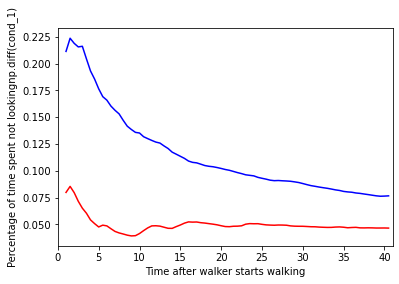

In [292]:
plt.xlabel('Time after walker starts walking')
plt.ylabel('Percentage of time spent not lookingnp.diff(cond_1)')

plt.xlim(0, 41)
plt.plot(offsets, cond_0, color='r')
plt.plot(offsets, cond_1, color='b')

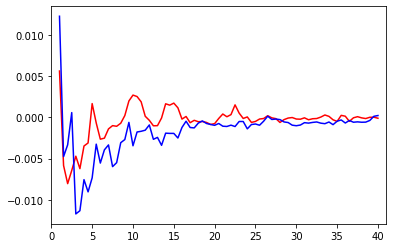

In [293]:
plt.xlim(0, 41)
plt.plot(offsets[:-1], np.diff(cond_0), color='r')
plt.plot(offsets[:-1], np.diff(cond_1), color='b')